# Background
You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

1. Data: cardholder data collected over the last 6 months 
2. Goal: understand the various kinds of users who use the company’s products
3. Impact: how to make new perks for different customer groups

# Summary
 ----- activity, main purpose ----  
- Group A: moderate, mainly for cash advance;
- Group B: modrate to low , mostly for installment purchase;
- Group C: low, all purpose;
- Group D: high, all purpose.

# Credit card users segmentation

### Group A:  2687, 
- moderate activity
- lowest: none
- highest: PURCHASES_INSTALLMENTS_FREQUENCY

### Group B:  3650, 
- modreate to low activity
- lowest: INSTALLMENTS_PURCHASES, PRC_FULL_PAYMENT, PURCHASES, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_TRX
- highest: BALANCE, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, MINIMUM_PAYMENTS

### Group C:  1210, 
- low activity
- lowest: BALANCE, BALANCE_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, CREDIT_LIMIT, MINIMUM_PAYMENTS,etc.
- hightest: none

###  Group D:  1402, 
- high activity
- lowest: none
- highest: BALANCE_FREQUENCY, CREDIT_LIMIT, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, etc.

### Note:
- TENURE values between different groups are similar
- Group B customers have significantly low BALANCE_FREQUENCY.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('cc_info.csv')

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data.CREDIT_LIMIT.sort_values(ascending=True)

6951       50.0
5508      150.0
6546      150.0
6565      150.0
3469      150.0
         ...   
3659    25000.0
970     28000.0
4905    30000.0
7046    30000.0
5203        NaN
Name: CREDIT_LIMIT, Length: 8950, dtype: float64

In [6]:
data.loc[5203] # NaN credit limit

CUST_ID                               C15349
BALANCE                              18.4005
BALANCE_FREQUENCY                   0.166667
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                         186.853
PURCHASES_FREQUENCY                        0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY              0.166667
CASH_ADVANCE_TRX                           1
PURCHASES_TRX                              0
CREDIT_LIMIT                             NaN
PAYMENTS                             9.04002
MINIMUM_PAYMENTS                     14.4187
PRC_FULL_PAYMENT                           0
TENURE                                     6
Name: 5203, dtype: object

## Anomaly
- a unidentified credit limit for Account C15349.
- does not seem to be a signficant one in terms of monetary value.
- therefore, removed from the following analysis

In [7]:
data = data.dropna(axis=0, subset=['CREDIT_LIMIT'])

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
data[data.isna().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [10]:
data.MINIMUM_PAYMENTS.sort_values(ascending=True)

1978    0.019163
7927    0.037744
3787    0.055880
8014    0.059481
1419    0.117036
          ...   
8919         NaN
8929         NaN
8935         NaN
8944         NaN
8946         NaN
Name: MINIMUM_PAYMENTS, Length: 8949, dtype: float64

#### MINIMUM_PAYMENT 'nan' indicates accounts have no history of unpaid minimum. Therefore, nan can be replaced by 0.

In [11]:
data = data.fillna(0)

In [12]:
data.info

<bound method DataFrame.info of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE 

In [13]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
print(pd.DataFrame(data.columns))

                                   0
0                            CUST_ID
1                            BALANCE
2                  BALANCE_FREQUENCY
3                          PURCHASES
4                   ONEOFF_PURCHASES
5             INSTALLMENTS_PURCHASES
6                       CASH_ADVANCE
7                PURCHASES_FREQUENCY
8         ONEOFF_PURCHASES_FREQUENCY
9   PURCHASES_INSTALLMENTS_FREQUENCY
10            CASH_ADVANCE_FREQUENCY
11                  CASH_ADVANCE_TRX
12                     PURCHASES_TRX
13                      CREDIT_LIMIT
14                          PAYMENTS
15                  MINIMUM_PAYMENTS
16                  PRC_FULL_PAYMENT
17                            TENURE


Key features: balance and frequency, purchase (one-off), installment, cash_advance, payment, etc.
Note: one-off purchase, purchase only happen once.

### Histogram for each category

In [15]:
data.columns[1:].values

array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], dtype=object)

In [16]:
len(data.columns[1:].values)

17

In [17]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
if len(data)==len(pd.unique(data.CUST_ID)):
    print('There is no duplicate customer ID, total:', len(data))

There is no duplicate customer ID, total: 8949


BALANCE , unique values:  8870


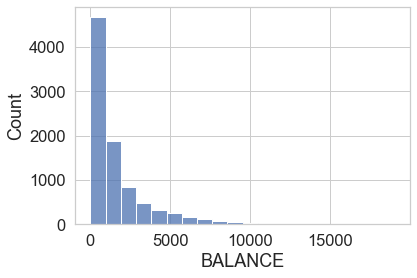

BALANCE_FREQUENCY , unique values:  43


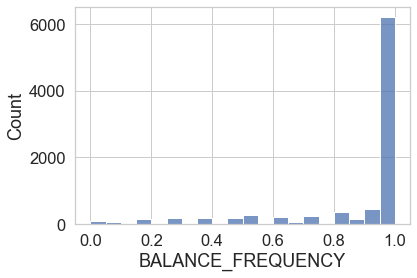

PURCHASES , unique values:  6203


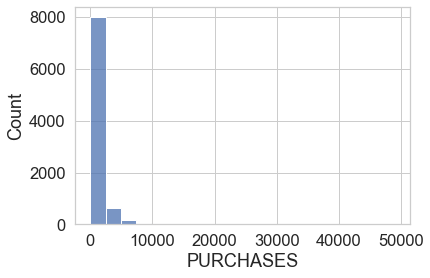

ONEOFF_PURCHASES , unique values:  4014


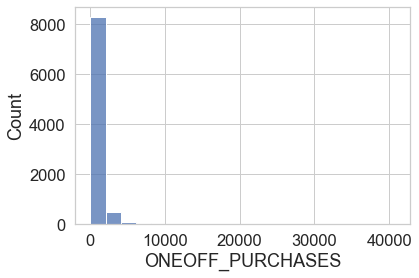

INSTALLMENTS_PURCHASES , unique values:  4452


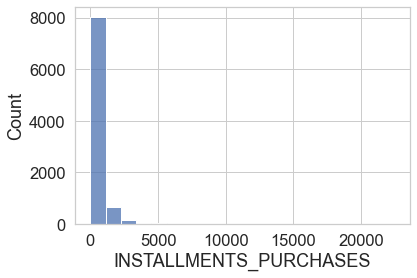

CASH_ADVANCE , unique values:  4322


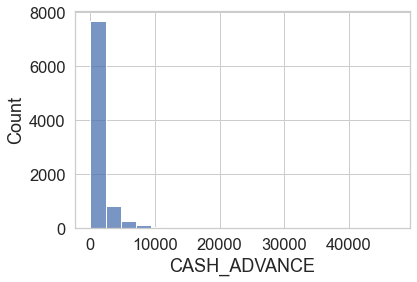

PURCHASES_FREQUENCY , unique values:  47


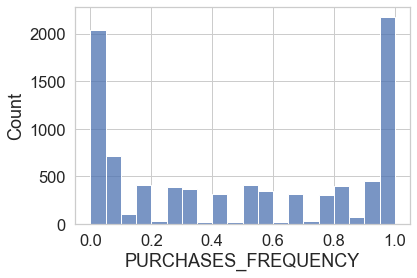

ONEOFF_PURCHASES_FREQUENCY , unique values:  47


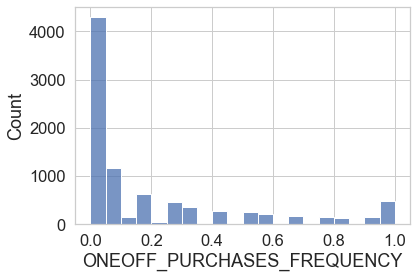

PURCHASES_INSTALLMENTS_FREQUENCY , unique values:  47


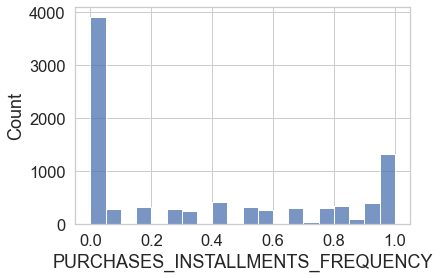

CASH_ADVANCE_FREQUENCY , unique values:  54


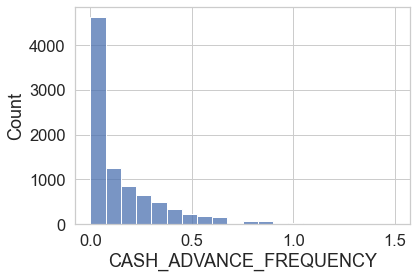

CASH_ADVANCE_TRX , unique values:  65


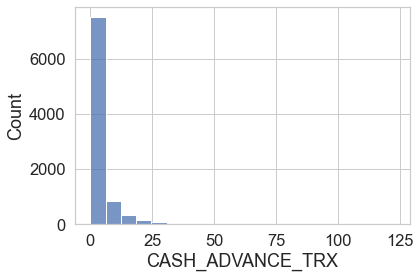

PURCHASES_TRX , unique values:  173


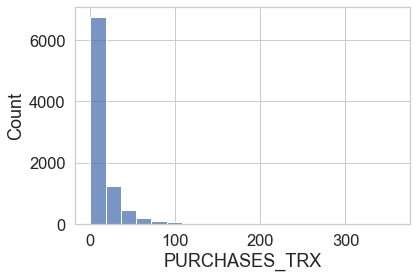

CREDIT_LIMIT , unique values:  205


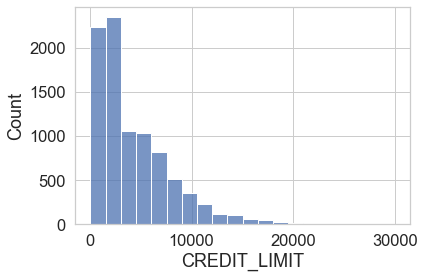

PAYMENTS , unique values:  8710


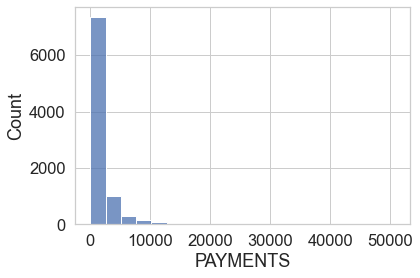

MINIMUM_PAYMENTS , unique values:  8636


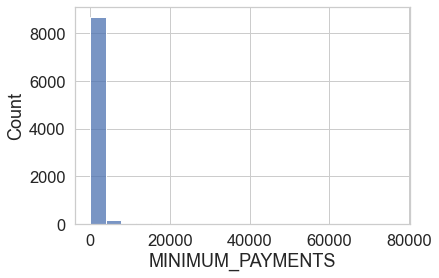

PRC_FULL_PAYMENT , unique values:  47


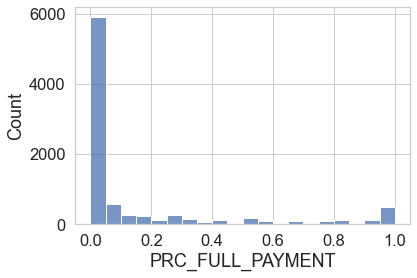

TENURE , unique values:  7


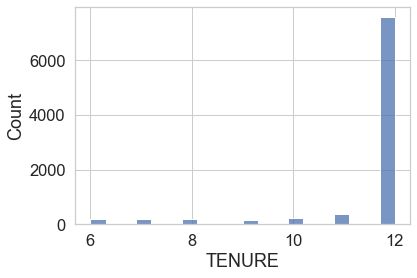

In [19]:
features = data.columns[1:].values
sns.set(style='whitegrid', font_scale=1.5)
for col in features:
    fig = sns.histplot(data=data, x=col, bins=20)
    print(col, ", unique values: ", len(pd.unique(data[col])))
    plt.show(fig)

### Values in all categories exhibit different scales. Therefore, the dataset needs to be normalized. Otherwise,  algorithms will give more weight to one or few variables.

In [20]:
scale = MinMaxScaler()

In [21]:
X = data.iloc[:,1:]
X_normal = scale.fit_transform(X)

In [22]:
data_normal = pd.DataFrame(X_normal, columns = X.columns)

# Correlation analysis

<Figure size 432x288 with 0 Axes>

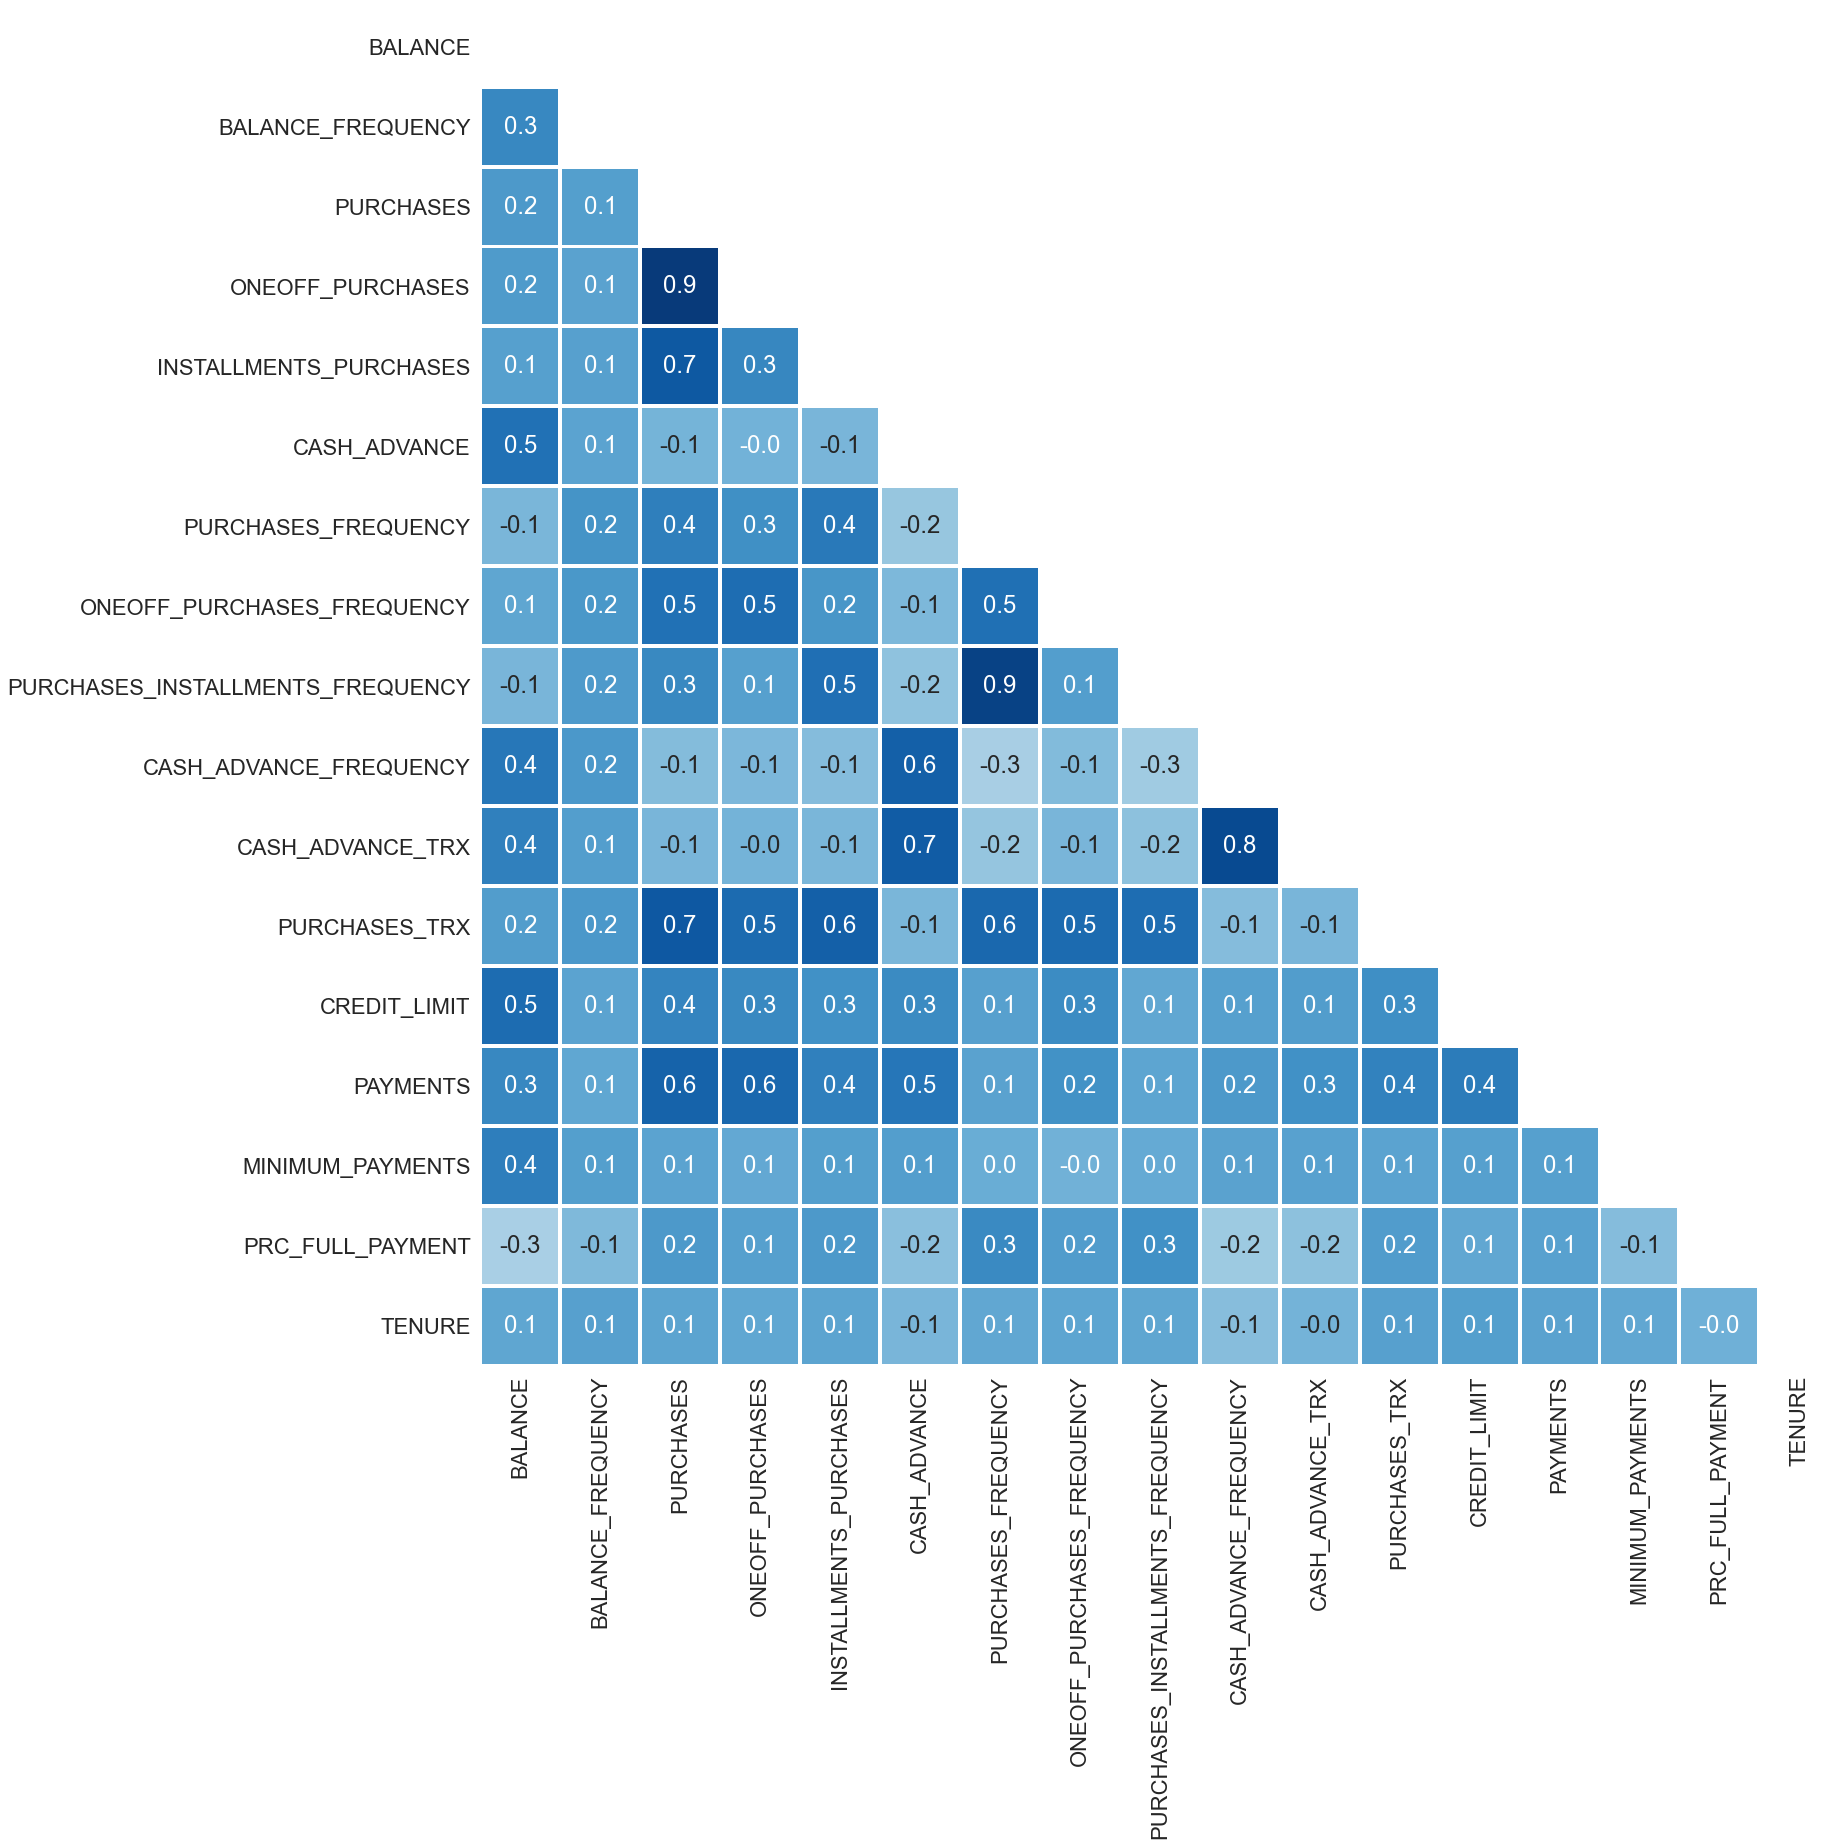

In [23]:
# Correlation matrix
fig = plt.figure()
sns.set(font_scale=2, style='white')
correlation_matrix = data_normal.corr()

plt.figure(figsize=(25,25))
matrix = np.triu(data_normal.corr())
sns.heatmap(correlation_matrix, mask = matrix, vmax=1, vmin=-1, square=True, cmap= 'Blues', annot=True, fmt='.1f', \
            linewidth=3, linecolor='white', cbar=False )
plt.xticks(rotation=90)
plt.show();

### Strong correlation: 
1. 0.9 ONEOFF purchase and purchases
    - clients have high spending also have high one-off purchase spending
2. 0.9 purchase_installment_frequency and purchase frequency
    - clients who have high freuqncy of purchase are mostly for installment
3. 0.8 CASH_ADVANCE_TRX and CASH_ADVANCE_frequency: amount and frequency 0.8
    - client who frequently cash advance are more likely to have higher total of cash advance
4. Other weak correlations
    - 0.7 or less

In [24]:
# define the model
model = KMeans(n_clusters=4, random_state=13)
# fit the model
model.fit(X_normal)

KMeans(n_clusters=4, random_state=13)

In [25]:
# add label into dataset
data_normal['label'] = model.labels_
data['label'] = model.labels_

In [26]:
pd.unique(data.label)

array([1, 3, 0, 2])

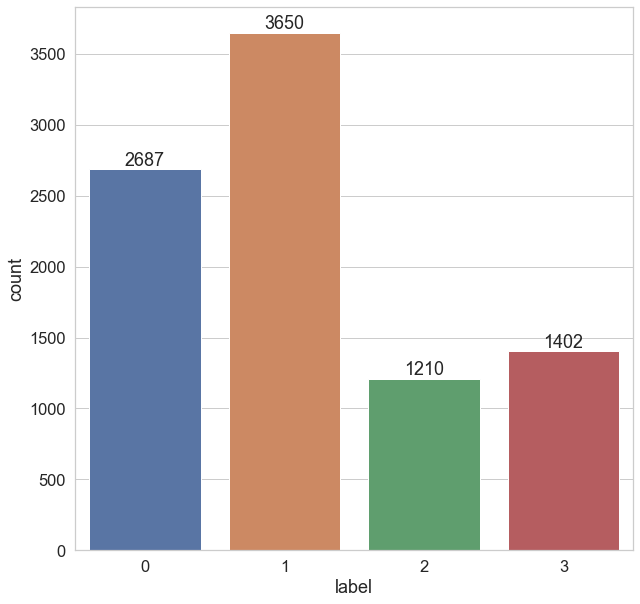

In [27]:
sns.set_theme(style='whitegrid', font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='label', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#ax.set_yscale('log')

In [28]:
for i in np.arange(4):
    print(data[data.label==i].describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   2687.000000        2687.000000   2687.000000       2687.000000   
mean    1179.575654           0.929710   1091.990584        280.140808   
std     1826.953068           0.170864   1267.126126        603.393865   
min        0.000000           0.000000     12.000000          0.000000   
25%       67.933976           1.000000    349.145000          0.000000   
50%      399.504570           1.000000    657.710000          0.000000   
75%     1463.235802           1.000000   1373.515000        287.000000   
max    16115.596400           1.000000  14686.100000       6345.650000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2687.000000   2687.000000          2687.000000   
mean               812.517168    520.529763             0.883255   
std                947.246450   1510.668027             0.150136   
min                 12.000000      0.000000             0.500

In [29]:
output = data.groupby('label').mean()

In [30]:
output

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
label,,,,,,,,,,,,,,,,,
0,1179.575654,0.929710,1091.990584,280.140808,812.517168,520.529763,0.883255,0.102362,0.832337,0.073461,1.792706,21.381838,3952.725337,1419.406459,939.460139,0.225288,11.516561
1,2184.301712,0.966161,291.996786,236.572162,55.588063,1598.851744,0.136649,0.087121,0.050054,0.225138,5.384384,2.700274,4222.485264,1488.047246,1010.964432,0.022976,11.492603
2,152.968148,0.380507,350.799579,235.801149,115.243719,507.636180,0.208927,0.073744,0.127096,0.050393,1.136364,3.404959,3882.716253,1391.937481,153.769591,0.247111,11.327273
3,1907.788030,0.974591,3248.394294,2425.655021,822.739272,650.497493,0.901399,0.805797,0.491256,0.092193,2.304565,42.955777,6768.685644,3268.235720,758.720906,0.276413,11.751070


### Summary of mean values of each group, hard to see anything

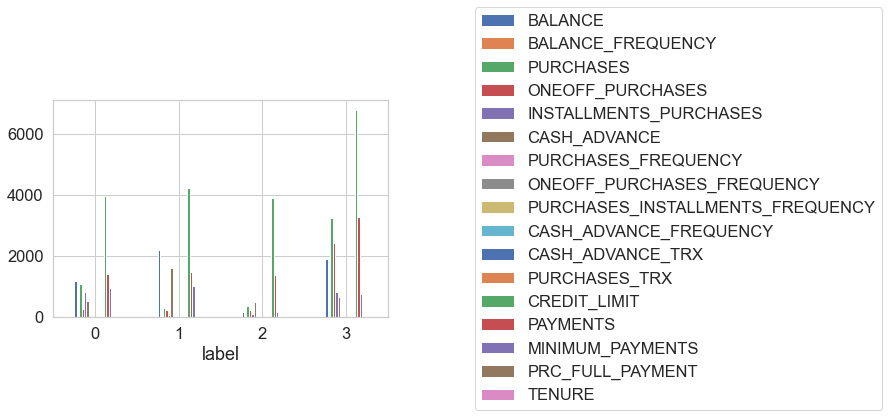

In [31]:
axes = output.plot.bar(legend=True,subplots=False, rot=0)
plt.legend(bbox_to_anchor=(2.5, 0.5), loc='right', ncol=1)
plt.show();

# Normalized output

In [32]:
output_normal = data_normal.groupby('label').mean()

In [33]:
output_normal

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
label,,,,,,,,,,,,,,,,,
0,0.061942,0.929710,0.022268,0.006873,0.036112,0.011043,0.883255,0.102362,0.832337,0.048974,0.014575,0.059726,0.130308,0.027984,0.012296,0.225288,0.919427
1,0.114703,0.966161,0.005954,0.005804,0.002471,0.033919,0.136649,0.087121,0.050054,0.150092,0.043775,0.007543,0.139315,0.029338,0.013231,0.022976,0.915434
2,0.008033,0.380507,0.007153,0.005785,0.005122,0.010769,0.208927,0.073744,0.127096,0.033595,0.009239,0.009511,0.127970,0.027443,0.002013,0.247111,0.887879
3,0.100182,0.974591,0.066240,0.059509,0.036566,0.013800,0.901399,0.805797,0.491256,0.061462,0.018736,0.119988,0.224330,0.064435,0.009930,0.276413,0.958512


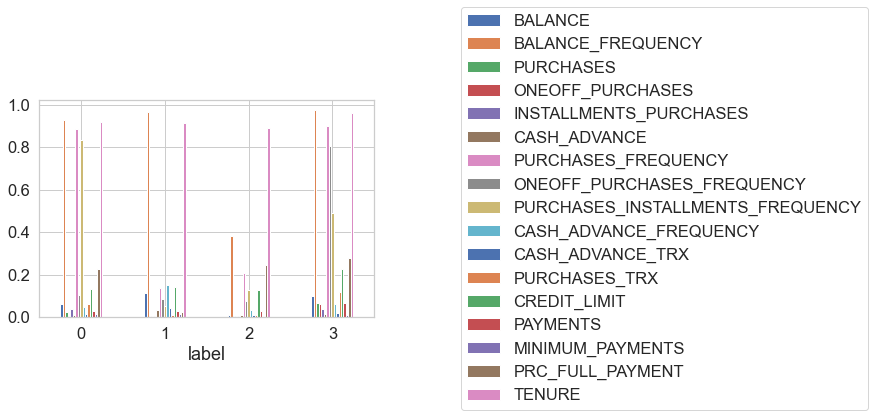

In [34]:
axes = output_normal.plot.bar(legend=True,subplots=False, rot=0)
plt.legend(bbox_to_anchor=(2.5, 0.5), loc='right', ncol=1)
plt.show();

## Mean comparison between different groups 
1. Oneoff_purchase and its frequency

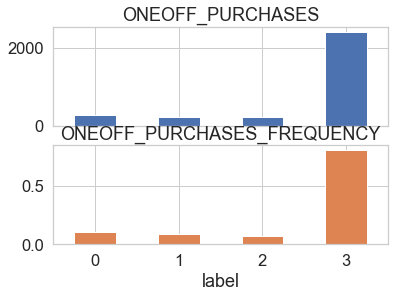

In [35]:
output[['ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY']].plot.bar(legend=False, subplots=True)
plt.xticks(rotation=0)
plt.show();

## Mean comparison between different groups 

2. Purchase_installment_frequency and purchase frequency

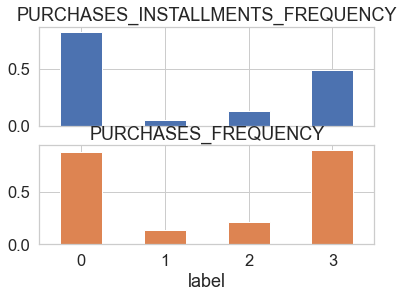

In [36]:
output[['PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY']].plot.bar(legend=False, subplots=True)
plt.xticks(rotation=0)
plt.show();

## Mean comparison between different groups 
3. Cash advance transaction and its frequency

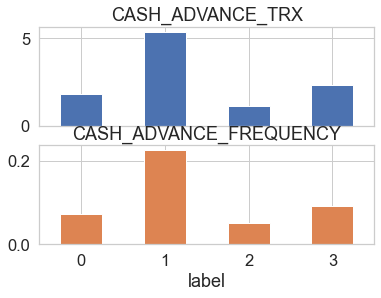

In [37]:
output[['CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY']].plot.bar(legend=False, subplots=True)
plt.xticks(rotation=0)
plt.show();

In [38]:
output_T = output.transpose()

In [39]:
output_T['min'], output_T['max'] = output_T.min(axis=1), output_T.max(axis=1)

In [40]:
output_T.loc[output_T.index[0], 'min']

152.96814759999987

In [41]:
# generate group_id for min and max
min_group, max_group = [], []
for i in range(len(output_T)):
    for j in range(4):
        if output_T.iloc[i, j]==output_T.loc[output_T.index[i], 'min']:
            min_group.append(j)
        elif output_T.iloc[i, j]==output_T.loc[output_T.index[i], 'max']:
            max_group.append(j)

In [42]:
output_T['min_group'] = min_group
output_T['max_group'] = max_group

In [43]:
output_T.sort_index()

label,0,1,2,3,min,max,min_group,max_group
BALANCE,1179.575654,2184.301712,152.968148,1907.788030,152.968148,2184.301712,2,1
BALANCE_FREQUENCY,0.929710,0.966161,0.380507,0.974591,0.380507,0.974591,2,3
CASH_ADVANCE,520.529763,1598.851744,507.636180,650.497493,507.636180,1598.851744,2,1
CASH_ADVANCE_FREQUENCY,0.073461,0.225138,0.050393,0.092193,0.050393,0.225138,2,1
CASH_ADVANCE_TRX,1.792706,5.384384,1.136364,2.304565,1.136364,5.384384,2,1
CREDIT_LIMIT,3952.725337,4222.485264,3882.716253,6768.685644,3882.716253,6768.685644,2,3
INSTALLMENTS_PURCHASES,812.517168,55.588063,115.243719,822.739272,55.588063,822.739272,1,3
MINIMUM_PAYMENTS,939.460139,1010.964432,153.769591,758.720906,153.769591,1010.964432,2,1
ONEOFF_PURCHASES,280.140808,236.572162,235.801149,2425.655021,235.801149,2425.655021,2,3
ONEOFF_PURCHASES_FREQUENCY,0.102362,0.087121,0.073744,0.805797,0.073744,0.805797,2,3


# Summary of user segmentation

### Group 0:  2687, 
- moderate activity
- lowest: none
- highest: PURCHASES_INSTALLMENTS_FREQUENCY

### Group 1:  3650, 
- modreate to low activity
- lowest: INSTALLMENTS_PURCHASES, PRC_FULL_PAYMENT, PURCHASES, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_TRX
- highest: BALANCE, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, MINIMUM_PAYMENTS

### Group 2:  1210, 
- low activity
- lowest: BALANCE, BALANCE_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, CREDIT_LIMIT, MINIMUM_PAYMENTS,etc.
- hightest: none

###  Group 3:  1402, 
- high activity
- lowest: none
- highest: BALANCE_FREQUENCY, CREDIT_LIMIT, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, etc.

### Note:
- TENURE values between different groups are similar
- Group B customers have significantly low BALANCE_FREQUENCY.

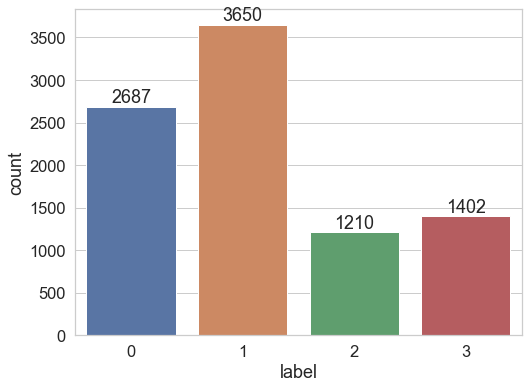

In [44]:
sns.set_theme(style='whitegrid', font_scale=1.5)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='label', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

# Final note:
### Effect of data scaling is significant: scaled vs none-scaled labels give an accuracy score of 0.545